In [1]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px

from IPython.display import display

import pandas as pd
import numpy as np
import json
import os

import DataMiner

pd.options.plotting.backend = "plotly"
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# import pymongo

# myclient = pymongo.MongoClient("mongodb://localhost:27017/")
# mydb = myclient["ATFCredit"]
# mycol = mydb["Txt_features"]

# # myquery = { "address": "Valley 345" }
# # newvalues = { "$set": { "address": "Canyon 123" } }

# # mycol.update_one(myquery, newvalues)

In [3]:
aux = pd.read_csv('Base_Treino.csv')
new_df_base = aux[['CNPJ','SConsData','Resultado','SCaminhoArquivo']]
new_df_base['txt_type'] = 'LIMPO'
new_df_base.loc[new_df_base['SCaminhoArquivo'].isnull(), 'txt_type'] = 'PURO'
new_df_base.loc[new_df_base['SCaminhoArquivo'].isnull(), 'SCaminhoArquivo'] = new_df_base[new_df_base['SCaminhoArquivo'].isnull()]['CNPJ'].apply(lambda x: str(x) +'.txt')
new_df_base.head()

<ipython-input-3-d7639e57c674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_base['txt_type'] = 'LIMPO'
C:\Users\rafae\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rafae\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,CNPJ,SConsData,Resultado,SCaminhoArquivo,txt_type
0,56633000111,2019-01-15 00:00:00,0,SERASA-R13939315.txt,LIMPO
1,61315000149,2020-01-30 00:00:00,0,61315000149.txt,LIMPO
2,87731000116,2019-06-06 00:00:00,1,SERASA-R12193942.txt,LIMPO
3,101599000150,2019-04-18 00:00:00,1,SERASA-R2200224.txt,LIMPO
4,126674000137,2019-05-16 00:00:00,1,SERASA-R12322061.txt,LIMPO


In [4]:
new_df_base.to_csv('Base_Treino.csv')

In [9]:
for i,j in new_df_base.iterrows():
    myquery = { "txt_file": 'DataBase/'+j['SCaminhoArquivo'] }
    newvalues = { "$set": { "result": j['Resultado'] } }

    mycol.update_one(myquery, newvalues)

In [18]:
cursor = mycol.find({'result': {'$ne': -1}})
df_base = pd.DataFrame()
for document in cursor:
    df_base = df_base.append(document, ignore_index=True)

In [5]:
import DataMiner
dbm = DataMiner.DataBaseManager()

In [6]:
df_base = dbm.get_base_to_train()

In [7]:
columns = ['8_TOTAL_FALENCIA_REQ', '8_TOTAL_FALENCIA__CONC',
       '7_TOTAL_COMMITMENTS', '7_TEND_CRESCIMENTO_VENCIDOS',
       '7_VALOR_TOTAL_VENCIDOS', '7_TEND_CRESCIMENTO_A_VENCER',
       '7_VALOR_TOTAL_A_VENCER', '7_TEND_CRESCIMENTO_TOTAL',
       '7_VALOR_TOTAL_TOTAL', '7_POSSUI_CRESCIMENTO', 'ACAO JUDICIAL',
       '6_TOTAL_PAGAMENTOS', '6_PAGAMENTO_PERCENT_15', '6_PAGAMENTO_VALOR_15',
       '6_PAGAMENTO_TEND_CRES_15', '6_PAGAMENTO_PERCENT_30',
       '6_PAGAMENTO_VALOR_30', '6_PAGAMENTO_TEND_CRES_30',
       '6_PAGAMENTO_PERCENT_60', '6_PAGAMENTO_VALOR_60',
       '6_PAGAMENTO_TEND_CRES_60', '6_PAGAMENTO_PERCENT_+60',
       '6_PAGAMENTO_VALOR_+60', '6_PAGAMENTO_TEND_CRES_+60',
       '6_PAGAMENTO_PERCENT_A_VISTA', '6_PAGAMENTO_VALOR_A_VISTA',
       '6_PAGAMENTO_TEND_CRES_A_VISTA', '6_PRESENCA_PAGAMENTOS', 'PROTESTO',
       '1_TOTAL_FACTORINGS', '1_FREQUENCIA_CONSULTAS',
       '1_FREQUENCIA_CONSULTAS_FACTORING', '2_TENDENCIA_CRESCIMENTO',
       '2_ACIMA_MEDIA', '2_TOTAL_CONSULTAS', '2_TOTAL_CONSULTAS_PONDERADA',
       '2_POSSUI_CRESCIMENTO','10_TOTAL_PROTESTOS',
       '10_STD_VALOR', '10_MEDIA_VALOR', '10_FREQUENCIA_PROTESTO',
       '3_ULTIMA_MODALIDADE', '3_MODALIDADE_MAIS_PRESENTE',
       '3_FREQUENCIA_DEBITO', '3_VALOR_DEBITO', '3_QUANTIDADE_DEBITO',
       '4_ULTIMA_MODALIDADE', '4_MODALIDADE_MAIS_PRESENTE',
       '4_FREQUENCIA_DEBITO', '4_VALOR_DEBITO', '4_QUANTIDADE_DEBITO',
       '4_TOTAL_FACTORINGS_DEBITO', '5_ULTIMA_MODALIDADE',
       '5_MODALIDADE_MAIS_PRESENTE', '5_FREQUENCIA_DEBITO', '5_VALOR_DEBITO',
       '5_QUANTIDADE_DEBITO', '9_NATUREZA_MAIS_PRESENTE',
       '9_TOTAL_ACAO_JUDICIAL', '9_VALOR_TOTAL', '9_FREQUENCIA_ACAO_JUDICIAL']

In [8]:
teste_df = df_base.iloc[0:2].drop(columns  = ['9_VALOR_TOTAL', '9_FREQUENCIA_ACAO_JUDICIAL'])
teste_df

,_id,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC,7_TOTAL_COMMITMENTS,7_TEND_CRESCIMENTO_VENCIDOS,7_VALOR_TOTAL_VENCIDOS,7_TEND_CRESCIMENTO_A_VENCER,7_VALOR_TOTAL_A_VENCER,7_TEND_CRESCIMENTO_TOTAL,7_VALOR_TOTAL_TOTAL,...,4_TOTAL_FACTORINGS_DEBITO,5_ULTIMA_MODALIDADE,5_MODALIDADE_MAIS_PRESENTE,5_FREQUENCIA_DEBITO,5_VALOR_DEBITO,5_QUANTIDADE_DEBITO,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,HISTORICO DE PAGAMENTOS NO MERCADO,CINCO ULTIMAS CONSULTAS
0,60a5044041edd429529ba211,1.0,1.0,14,1.0,3000000.0,0.0,51000000.0,0.0,55000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60a5044041edd429529ba215,NaN,NaN,14,1.0,210000000.0,0.0,28800000.0,1.0,210000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
aux_df = pd.DataFrame(columns = columns)

In [159]:
for c in columns:
    aux_df[c] = [np.nan]

In [166]:
for c in columns:
    if c not in teste_df.columns:
        teste_df = np.nan
        print(c)

9_VALOR_TOTAL
9_FREQUENCIA_ACAO_JUDICIAL


In [9]:
df_base

,_id,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC,7_TOTAL_COMMITMENTS,7_TEND_CRESCIMENTO_VENCIDOS,7_VALOR_TOTAL_VENCIDOS,7_TEND_CRESCIMENTO_A_VENCER,7_VALOR_TOTAL_A_VENCER,7_TEND_CRESCIMENTO_TOTAL,7_VALOR_TOTAL_TOTAL,...,5_MODALIDADE_MAIS_PRESENTE,5_FREQUENCIA_DEBITO,5_VALOR_DEBITO,5_QUANTIDADE_DEBITO,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,9_VALOR_TOTAL,9_FREQUENCIA_ACAO_JUDICIAL,HISTORICO DE PAGAMENTOS NO MERCADO,CINCO ULTIMAS CONSULTAS
0,60a5044041edd429529ba211,1.0,1.0,14,1.0,3000000.0,0.0,51000000.0,0.0,55000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60a5044041edd429529ba215,NaN,NaN,14,1.0,210000000.0,0.0,28800000.0,1.0,210000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60a5044041edd429529ba219,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60a5044041edd429529ba21d,NaN,NaN,0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60a5044041edd429529ba221,NaN,NaN,0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,60a504eb41edd429529bafc1,3.0,0.0,14,0.0,144915411.0,0.0,84977713.0,0.0,0.0,...,NaN,NaN,NaN,NaN,FISCAL MUNICIPAL,5.0,55843038.0,38.0,NaN,NaN
800,60a504eb41edd429529bafc5,NaN,NaN,0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,60a504eb41edd429529bafc9,NaN,NaN,12,0.0,80133.0,0.0,4215381.0,0.0,4295514.0,...,DEV,15.0,100730.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
802,60a504eb41edd429529bafcd,NaN,NaN,13,0.0,45890592.0,0.0,8527723.0,0.0,0.0,...,DEV,0.0,2555.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:


cursor = dbm.get_all_base('Txt_features')
df_base = pd.DataFrame()

for document in cursor:
    df_base = df_base.append(document, ignore_index=True)
    

In [10]:
df = df_base.copy()

In [11]:
df = df[df.result != -1].reset_index(drop = True)
irrelevants = set()

In [12]:
std_columns_convert = set()
modalidade_columns = set()

In [13]:
columns_drop = ['_id',
'cnpj',
'result',
'txt_file']

##  Consultas recentes

In [14]:
columns = df.columns
columns = columns[columns.str.contains('1_')]
columns

Index(['1_TOTAL_FACTORINGS', '1_FREQUENCIA_CONSULTAS',
       '1_FREQUENCIA_CONSULTAS_FACTORING'],
      dtype='object')

In [15]:
df[columns].describe()

,1_TOTAL_FACTORINGS,1_FREQUENCIA_CONSULTAS,1_FREQUENCIA_CONSULTAS_FACTORING
count,800.000000,797.000000,241.000000
mean,1.131250,5.441656,9.539419
std,1.099106,6.656932,17.023987
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,1.000000,3.000000,5.000000
75%,2.000000,6.000000,12.000000
max,6.000000,54.000000,146.000000


In [16]:
def frequency_type(x):
    try:
        if x <= 7:
            return 1
        elif (x > 7) and (x <= 15):
            return 2
        elif x > 15:
            return 3
        
    except:
        return 0

In [17]:
df['1_FREQUENCIA_CONSULTAS'] = df['1_FREQUENCIA_CONSULTAS'].apply(frequency_type)
df['1_FREQUENCIA_CONSULTAS_FACTORING'] = df['1_FREQUENCIA_CONSULTAS_FACTORING'].apply(frequency_type)

df['1_FREQUENCIA_CONSULTAS'] = df['1_FREQUENCIA_CONSULTAS'].fillna(0)
df['1_FREQUENCIA_CONSULTAS_FACTORING'] = df['1_FREQUENCIA_CONSULTAS_FACTORING'].fillna(0)
df['1_TOTAL_FACTORINGS'] = df['1_TOTAL_FACTORINGS'].fillna(0)

In [18]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')
    
    

1_TOTAL_FACTORINGS
TOTAL NULL:  0
0.0    277
1.0    275
2.0    157
3.0     70
4.0     20
5.0      4
6.0      1
Name: 1_TOTAL_FACTORINGS, dtype: int64

1_FREQUENCIA_CONSULTAS
TOTAL NULL:  0
1.0    635
2.0    109
3.0     53
0.0      7
Name: 1_FREQUENCIA_CONSULTAS, dtype: int64

1_FREQUENCIA_CONSULTAS_FACTORING
TOTAL NULL:  0
0.0    563
1.0    156
2.0     52
3.0     33
Name: 1_FREQUENCIA_CONSULTAS_FACTORING, dtype: int64



## Registro de Consultas

In [19]:
columns = df.columns
columns = columns[columns.str.contains('2_')]
columns

Index(['2_TENDENCIA_CRESCIMENTO', '2_ACIMA_MEDIA', '2_TOTAL_CONSULTAS',
       '2_TOTAL_CONSULTAS_PONDERADA', '2_POSSUI_CRESCIMENTO'],
      dtype='object')

In [20]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

2_TENDENCIA_CRESCIMENTO
TOTAL NULL:  0
0    551
1    253
Name: 2_TENDENCIA_CRESCIMENTO, dtype: int64

2_ACIMA_MEDIA
TOTAL NULL:  0
1    496
0    308
Name: 2_ACIMA_MEDIA, dtype: int64

2_TOTAL_CONSULTAS
TOTAL NULL:  0
530     4
568     3
404     3
1414    3
564     3
       ..
1644    1
1642    1
1638    1
1144    1
462     1
Name: 2_TOTAL_CONSULTAS, Length: 656, dtype: int64

2_TOTAL_CONSULTAS_PONDERADA
TOTAL NULL:  0
67     10
96      9
26      9
29      8
51      8
       ..
265     1
263     1
262     1
256     1
1       1
Name: 2_TOTAL_CONSULTAS_PONDERADA, Length: 341, dtype: int64

2_POSSUI_CRESCIMENTO
TOTAL NULL:  0
0    506
1    298
Name: 2_POSSUI_CRESCIMENTO, dtype: int64



In [21]:
df[columns].describe()

,2_TENDENCIA_CRESCIMENTO,2_ACIMA_MEDIA,2_TOTAL_CONSULTAS,2_TOTAL_CONSULTAS_PONDERADA,2_POSSUI_CRESCIMENTO
count,804.000000,804.000000,804.000000,804.000000,804.000000
mean,0.314677,0.616915,1079.680348,166.411692,0.370647
std,0.464676,0.486441,1060.001471,164.430497,0.483279
min,0.000000,0.000000,8.000000,1.000000,0.000000
25%,0.000000,0.000000,413.250000,64.000000,0.000000
50%,0.000000,1.000000,801.500000,122.000000,0.000000
75%,1.000000,1.000000,1371.750000,213.500000,1.000000
max,1.000000,1.000000,11468.000000,1812.000000,1.000000


In [22]:
df['2_TENDENCIA_CRESCIMENTO'] = df['2_TENDENCIA_CRESCIMENTO'].fillna(-1)
df['2_ACIMA_MEDIA'] = df['2_ACIMA_MEDIA'].fillna(-1)
df['2_TOTAL_CONSULTAS_PONDERADA'] = df['2_TOTAL_CONSULTAS_PONDERADA'].fillna(0)
df['2_POSSUI_CRESCIMENTO'] = df['2_POSSUI_CRESCIMENTO'].fillna(-1)

In [23]:
df = df.drop(columns = ['2_TOTAL_CONSULTAS'])

In [24]:
std_columns_convert.add('2_TOTAL_CONSULTAS_PONDERADA')

## REFIN

In [25]:
columns = df.columns
columns = columns[columns.str.contains('3_')]
columns

Index(['3_ULTIMA_MODALIDADE', '3_MODALIDADE_MAIS_PRESENTE',
       '3_FREQUENCIA_DEBITO', '3_VALOR_DEBITO', '3_QUANTIDADE_DEBITO'],
      dtype='object')

In [26]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

3_ULTIMA_MODALIDADE
TOTAL NULL:  637
FINANCIAMENT    60
OUTRAS OPER     31
EMPRES.CONTA    21
ADIANT.CONTA    15
EMPRESTIMO      13
CRED.CARTAO     10
REPASSES         7
TIT.DESCONTA     6
OPER.CAMBIO      2
CONS VEICULO     1
CREDITO E FI     1
Name: 3_ULTIMA_MODALIDADE, dtype: int64

3_MODALIDADE_MAIS_PRESENTE
TOTAL NULL:  637
FINANCIAMENT    55
OUTRAS OPER     50
TIT.DESCONTA    16
EMPRES.CONTA    12
EMPRESTIMO      11
REPASSES        11
ADIANT.CONTA     3
OUTRAS OPERA     2
OPER.CAMBIO      2
CRED.CARTAO      2
LEASING          2
OPERACOES DE     1
Name: 3_MODALIDADE_MAIS_PRESENTE, dtype: int64

3_FREQUENCIA_DEBITO
TOTAL NULL:  668
31.0     7
6.0      4
17.0     4
9.0      4
14.0     4
        ..
5.0      1
106.0    1
70.0     1
99.0     1
573.0    1
Name: 3_FREQUENCIA_DEBITO, Length: 89, dtype: int64

3_VALOR_DEBITO
TOTAL NULL:  637
877567.0     1
397473.0     1
28908.0      1
39635.0      1
281748.0     1
            ..
2726175.0    1
6228229.0    1
15017.0      1
7786998.0    1


In [27]:
df['3_FREQUENCIA_DEBITO'] = df['3_FREQUENCIA_DEBITO'].apply(frequency_type)

df['3_FREQUENCIA_DEBITO'] = df['3_FREQUENCIA_DEBITO'].fillna(0)
df['3_VALOR_DEBITO'] = df['3_VALOR_DEBITO'].fillna(0)
df['3_QUANTIDADE_DEBITO'] = df['3_QUANTIDADE_DEBITO'].fillna(0)



In [28]:
modalidade_columns.add('3_ULTIMA_MODALIDADE')
modalidade_columns.add('3_MODALIDADE_MAIS_PRESENTE')

In [29]:
df[columns].describe()

,3_FREQUENCIA_DEBITO,3_VALOR_DEBITO,3_QUANTIDADE_DEBITO
count,804.000000,8.040000e+02,804.000000
mean,0.444030,1.995633e+05,0.766169
std,1.023072,1.163026e+06,1.670952
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000e+00,0.000000
max,3.000000,2.114964e+07,5.000000


In [30]:
std_columns_convert.add('3_VALOR_DEBITO')

## PEFIN

In [31]:
columns = df.columns
columns = columns[columns.str.contains('4_')]
columns

Index(['4_ULTIMA_MODALIDADE', '4_MODALIDADE_MAIS_PRESENTE',
       '4_FREQUENCIA_DEBITO', '4_VALOR_DEBITO', '4_QUANTIDADE_DEBITO',
       '4_TOTAL_FACTORINGS_DEBITO'],
      dtype='object')

In [32]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

4_ULTIMA_MODALIDADE
TOTAL NULL:  576
DUPLICATA       83
OUTRAS OPER     54
NOTA FISCAL     41
TIT.DESCONTA    22
EMPRESTIMO       7
SERV TELEFON     4
ADIANT.CONTA     4
CONFISS DIV      3
ALUGUEL          2
VENDA MERCAD     2
SEGURO SAUDE     2
CONS VEI PES     1
ARRECADADOR      1
ENERGIA ELET     1
SEGURO RISCO     1
Name: 4_ULTIMA_MODALIDADE, dtype: int64

4_MODALIDADE_MAIS_PRESENTE
TOTAL NULL:  576
OUTRAS OPER     78
DUPLICATA       45
NOTA FISCAL     40
TIT.DESCONTA    39
EMPRESTIMO       6
VENDA MERCAD     6
SERV TELEFON     5
ALUGUEL          2
SEGURO SAUDE     2
ADIANT.CONTA     1
RENEG DIVIDA     1
ENERGIA ELET     1
SEGURO RISCO     1
CONFISS DIV      1
Name: 4_MODALIDADE_MAIS_PRESENTE, dtype: int64

4_FREQUENCIA_DEBITO
TOTAL NULL:  630
5.0      11
8.0       8
0.0       6
18.0      5
16.0      5
         ..
132.0     1
9.0       1
69.0      1
74.0      1
188.0     1
Name: 4_FREQUENCIA_DEBITO, Length: 96, dtype: int64

4_VALOR_DEBITO
TOTAL NULL:  576
140.0        2
550.0     

In [33]:
df['4_FREQUENCIA_DEBITO'] = df['4_FREQUENCIA_DEBITO'].apply(frequency_type)

df['4_FREQUENCIA_DEBITO'] = df['4_FREQUENCIA_DEBITO'].fillna(0)
df['4_VALOR_DEBITO'] = df['4_VALOR_DEBITO'].fillna(0)
df['4_QUANTIDADE_DEBITO'] = df['4_QUANTIDADE_DEBITO'].fillna(0)
df['4_TOTAL_FACTORINGS_DEBITO'] = df['4_TOTAL_FACTORINGS_DEBITO'].fillna(0)


In [34]:
modalidade_columns.add('4_ULTIMA_MODALIDADE')
modalidade_columns.add('4_MODALIDADE_MAIS_PRESENTE')

std_columns_convert.add('4_VALOR_DEBITO')

## DIVIDA VENCIDA

In [35]:
columns = df.columns
columns = columns[columns.str.contains('5_')]
columns

Index(['5_ULTIMA_MODALIDADE', '5_MODALIDADE_MAIS_PRESENTE',
       '5_FREQUENCIA_DEBITO', '5_VALOR_DEBITO', '5_QUANTIDADE_DEBITO'],
      dtype='object')

In [36]:
df['5_FREQUENCIA_DEBITO'] = df['5_FREQUENCIA_DEBITO'].apply(frequency_type)

df['5_FREQUENCIA_DEBITO'] = df['5_FREQUENCIA_DEBITO'].fillna(0)
df['5_VALOR_DEBITO'] = df['5_VALOR_DEBITO'].fillna(0)
df['5_QUANTIDADE_DEBITO'] = df['5_QUANTIDADE_DEBITO'].fillna(0)

In [37]:
modalidade_columns.add('5_ULTIMA_MODALIDADE')
modalidade_columns.add('5_MODALIDADE_MAIS_PRESENTE')

std_columns_convert.add('5_VALOR_DEBITO')

## Historico de Pagamentos

In [38]:
columns = df.columns
columns = columns[columns.str.contains('6_')]
columns

Index(['6_TOTAL_PAGAMENTOS', '6_PAGAMENTO_PERCENT_15', '6_PAGAMENTO_VALOR_15',
       '6_PAGAMENTO_TEND_CRES_15', '6_PAGAMENTO_PERCENT_30',
       '6_PAGAMENTO_VALOR_30', '6_PAGAMENTO_TEND_CRES_30',
       '6_PAGAMENTO_PERCENT_60', '6_PAGAMENTO_VALOR_60',
       '6_PAGAMENTO_TEND_CRES_60', '6_PAGAMENTO_PERCENT_+60',
       '6_PAGAMENTO_VALOR_+60', '6_PAGAMENTO_TEND_CRES_+60',
       '6_PAGAMENTO_PERCENT_A_VISTA', '6_PAGAMENTO_VALOR_A_VISTA',
       '6_PAGAMENTO_TEND_CRES_A_VISTA', '6_PRESENCA_PAGAMENTOS'],
      dtype='object')

In [39]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

6_TOTAL_PAGAMENTOS
TOTAL NULL:  120
16.0    400
15.0    141
14.0     34
13.0     21
17.0     19
12.0     16
10.0     11
11.0      9
8.0       8
4.0       7
9.0       6
6.0       5
7.0       4
3.0       2
30.0      1
Name: 6_TOTAL_PAGAMENTOS, dtype: int64

6_PAGAMENTO_PERCENT_15
TOTAL NULL:  120
6.0      145
18.0      79
25.0      51
0.0       44
31.0      34
7.0       27
20.0      26
37.0      22
12.0      20
33.0      19
50.0      17
56.0      16
43.0      15
26.0      11
100.0     11
68.0      10
75.0       9
8.0        9
46.0       9
62.0       8
40.0       6
21.0       6
87.0       6
11.0       6
9.0        5
73.0       5
60.0       5
23.0       5
13.0       4
27.0       4
14.0       4
10.0       4
66.0       4
42.0       3
93.0       3
81.0       3
30.0       3
47.0       3
29.0       3
16.0       3
28.0       2
35.0       2
82.0       1
17.0       1
52.0       1
57.0       1
70.0       1
64.0       1
58.0       1
61.0       1
38.0       1
80.0       1
94.0       1
44.0       1
53

In [40]:
df['6_PAGAMENTO_PERCENT_+60'] = df['6_PAGAMENTO_PERCENT_+60'].fillna(0)
df['6_PAGAMENTO_PERCENT_15'] = df['6_PAGAMENTO_PERCENT_15'].fillna(0)
df['6_PAGAMENTO_PERCENT_30'] = df['6_PAGAMENTO_PERCENT_30'].fillna(0)
df['6_PAGAMENTO_PERCENT_60'] = df['6_PAGAMENTO_PERCENT_60'].fillna(0)
df['6_PAGAMENTO_PERCENT_A_VISTA'] = df['6_PAGAMENTO_PERCENT_A_VISTA'].fillna(0)
df['6_PAGAMENTO_VALOR_+60'] = df['6_PAGAMENTO_VALOR_+60'].fillna(0)
df['6_PAGAMENTO_VALOR_15'] = df['6_PAGAMENTO_VALOR_15'].fillna(0)
df['6_PAGAMENTO_VALOR_30'] = df['6_PAGAMENTO_VALOR_30'].fillna(0)
df['6_PAGAMENTO_VALOR_60'] = df['6_PAGAMENTO_VALOR_60'].fillna(0)
df['6_PAGAMENTO_VALOR_A_VISTA'] = df['6_PAGAMENTO_VALOR_A_VISTA'].fillna(0)
df['6_TOTAL_PAGAMENTOS'] = df['6_TOTAL_PAGAMENTOS'].fillna(0)

df['6_PAGAMENTO_TEND_CRES_+60'] = df['6_PAGAMENTO_TEND_CRES_+60'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_15'] = df['6_PAGAMENTO_TEND_CRES_15'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_30'] = df['6_PAGAMENTO_TEND_CRES_30'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_60'] = df['6_PAGAMENTO_TEND_CRES_60'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_A_VISTA'] = df['6_PAGAMENTO_TEND_CRES_A_VISTA'].fillna(0)


df['6_PRESENCA_PAGAMENTOS'] = df['6_PRESENCA_PAGAMENTOS'].fillna(0)

In [41]:
std_columns_convert.add('6_PAGAMENTO_PERCENT_+60')
std_columns_convert.add('6_PAGAMENTO_PERCENT_15')
std_columns_convert.add('6_PAGAMENTO_PERCENT_30')
std_columns_convert.add('6_PAGAMENTO_PERCENT_60')
std_columns_convert.add('6_PAGAMENTO_PERCENT_A_VISTA')
std_columns_convert.add('6_PAGAMENTO_VALOR_+60')
std_columns_convert.add('6_PAGAMENTO_VALOR_15')
std_columns_convert.add('6_PAGAMENTO_VALOR_30')
std_columns_convert.add('6_PAGAMENTO_VALOR_60')
std_columns_convert.add('6_PAGAMENTO_VALOR_A_VISTA')
std_columns_convert.add('6_TOTAL_PAGAMENTOS')

# df = df.drop(columns = ['6_PAGAMENTO_TEND_CRES_+60',
#        '6_PAGAMENTO_TEND_CRES_15', '6_PAGAMENTO_TEND_CRES_30',
#        '6_PAGAMENTO_TEND_CRES_60', '6_PAGAMENTO_TEND_CRES_A_VISTA'])

## Evolução de Compromissos

In [42]:
columns = df.columns
columns = columns[columns.str.contains('7_')]
columns

Index(['7_TOTAL_COMMITMENTS', '7_TEND_CRESCIMENTO_VENCIDOS',
       '7_VALOR_TOTAL_VENCIDOS', '7_TEND_CRESCIMENTO_A_VENCER',
       '7_VALOR_TOTAL_A_VENCER', '7_TEND_CRESCIMENTO_TOTAL',
       '7_VALOR_TOTAL_TOTAL', '7_POSSUI_CRESCIMENTO'],
      dtype='object')

In [43]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

7_TOTAL_COMMITMENTS
TOTAL NULL:  0
0     459
14    239
13     32
3      10
9       9
5       9
11      7
12      6
8       6
6       6
10      5
7       5
2       5
4       3
1       3
Name: 7_TOTAL_COMMITMENTS, dtype: int64

7_TEND_CRESCIMENTO_VENCIDOS
TOTAL NULL:  462
0.0    193
1.0    149
Name: 7_TEND_CRESCIMENTO_VENCIDOS, dtype: int64

7_VALOR_TOTAL_VENCIDOS
TOTAL NULL:  1
0.0           496
1400000.0       2
55510.0         1
3700000.0       1
492548.0        1
             ... 
256430.0        1
2400000.0       1
14609380.0      1
13464.0         1
443184.0        1
Name: 7_VALOR_TOTAL_VENCIDOS, Length: 307, dtype: int64

7_TEND_CRESCIMENTO_A_VENCER
TOTAL NULL:  462
0.0    221
1.0    121
Name: 7_TEND_CRESCIMENTO_A_VENCER, dtype: int64

7_VALOR_TOTAL_A_VENCER
TOTAL NULL:  1
0.0            485
103461696.0      1
969049.0         1
21932889.0       1
2631023.0        1
              ... 
13150862.0       1
2325164.0        1
602799.0         1
112598.0         1
8527723.0        1
Na

In [44]:
df['7_TEND_CRESCIMENTO_A_VENCER'] = df['7_TEND_CRESCIMENTO_A_VENCER'].fillna(-1)
df['7_TEND_CRESCIMENTO_TOTAL'] = df['7_TEND_CRESCIMENTO_TOTAL'].fillna(-1)
df['7_TEND_CRESCIMENTO_VENCIDOS'] = df['7_TEND_CRESCIMENTO_VENCIDOS'].fillna(-1)

df['7_TOTAL_COMMITMENTS'] = df['7_TOTAL_COMMITMENTS'].fillna(0)
df['7_VALOR_TOTAL_A_VENCER'] = df['7_VALOR_TOTAL_A_VENCER'].fillna(0)
df['7_VALOR_TOTAL_VENCIDOS'] = df['7_VALOR_TOTAL_VENCIDOS'].fillna(0)

In [45]:
df['7_VALOR_TOTAL_TOTAL'] = df['7_VALOR_TOTAL_TOTAL'].fillna(0)
df['7_POSSUI_CRESCIMENTO'] = df['7_POSSUI_CRESCIMENTO'].fillna(0)
              

In [46]:
std_columns_convert.add('7_TOTAL_COMMITMENTS')
std_columns_convert.add('7_VALOR_TOTAL_A_VENCER')
std_columns_convert.add('7_VALOR_TOTAL_VENCIDOS')

## Falencia

In [47]:
columns = df.columns
columns = columns[columns.str.contains('8_')]
columns

Index(['8_TOTAL_FALENCIA_REQ', '8_TOTAL_FALENCIA__CONC'], dtype='object')

In [48]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

8_TOTAL_FALENCIA_REQ
TOTAL NULL:  759
1.0    42
0.0     2
3.0     1
Name: 8_TOTAL_FALENCIA_REQ, dtype: int64

8_TOTAL_FALENCIA__CONC
TOTAL NULL:  759
0.0    31
1.0    14
Name: 8_TOTAL_FALENCIA__CONC, dtype: int64



In [49]:
df.loc[df['8_TOTAL_FALENCIA_REQ'] > 0, '8_TOTAL_FALENCIA_REQ'] = 1
df.loc[df['8_TOTAL_FALENCIA__CONC'] > 0, '8_TOTAL_FALENCIA__CONC'] = 1

In [50]:
df['8_TOTAL_FALENCIA_REQ'] = df['8_TOTAL_FALENCIA_REQ'].fillna(0)
df['8_TOTAL_FALENCIA__CONC'] = df['8_TOTAL_FALENCIA__CONC'].fillna(0)

## Ação Judicial

In [51]:
columns = df.columns
columns = columns[columns.str.contains('9_')]
columns

Index(['9_NATUREZA_MAIS_PRESENTE', '9_TOTAL_ACAO_JUDICIAL', '9_VALOR_TOTAL',
       '9_FREQUENCIA_ACAO_JUDICIAL'],
      dtype='object')

In [52]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

9_NATUREZA_MAIS_PRESENTE
TOTAL NULL:  712
EXECUCAO            48
FISCAL ESTADUAL     20
FISCAL MUNICIPAL    10
EXC JUD TRAB         5
EXECUCAO - JE        5
FISCAL FEDERAL       4
Name: 9_NATUREZA_MAIS_PRESENTE, dtype: int64

9_TOTAL_ACAO_JUDICIAL
TOTAL NULL:  712
1.0    47
2.0    15
5.0    13
3.0    10
4.0     7
Name: 9_TOTAL_ACAO_JUDICIAL, dtype: int64

9_VALOR_TOTAL
TOTAL NULL:  712
0.0           63
1500950.0      1
736355.0       1
85903.0        1
4537.0         1
426599.0       1
2130829.0      1
12725.0        1
3310505.0      1
574712.0       1
3213.0         1
52497.0        1
15029.0        1
3499291.0      1
55843038.0     1
28737085.0     1
145255.0       1
327935.0       1
37856.0        1
536126.0       1
2279769.0      1
951922.0       1
1234170.0      1
1273215.0      1
60781.0        1
91751.0        1
53876.0        1
17557984.0     1
929661.0       1
4828270.0      1
Name: 9_VALOR_TOTAL, dtype: int64

9_FREQUENCIA_ACAO_JUDICIAL
TOTAL NULL:  759
0.0      3
90.0     2


In [53]:
df['9_FREQUENCIA_ACAO_JUDICIAL'] = df['9_FREQUENCIA_ACAO_JUDICIAL'].apply(frequency_type)
df['9_FREQUENCIA_ACAO_JUDICIAL'] = df['9_FREQUENCIA_ACAO_JUDICIAL'].fillna(0)
df['9_TOTAL_ACAO_JUDICIAL'] = df['9_TOTAL_ACAO_JUDICIAL'].fillna(0)
df['9_VALOR_TOTAL'] = df['9_VALOR_TOTAL'].fillna(0)

In [54]:
std_columns_convert.add('9_TOTAL_ACAO_JUDICIAL')
std_columns_convert.add('9_VALOR_TOTAL')
modalidade_columns.add('9_NATUREZA_MAIS_PRESENTE')

## Protesto

In [55]:
columns = df.columns
columns = columns[columns.str.contains('10_')]
columns

Index(['10_TOTAL_PROTESTOS', '10_STD_VALOR', '10_MEDIA_VALOR',
       '10_FREQUENCIA_PROTESTO'],
      dtype='object')

In [56]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

10_TOTAL_PROTESTOS
TOTAL NULL:  553
5.0    190
1.0     25
3.0     15
2.0     13
4.0      8
Name: 10_TOTAL_PROTESTOS, dtype: int64

10_STD_VALOR
TOTAL NULL:  578
0.000000        2
506.714219      1
630.467921      1
14144.264269    1
2726.281020     1
               ..
8714.566656     1
8698.329455     1
60162.785089    1
3507.067536     1
3672.742000     1
Name: 10_STD_VALOR, Length: 225, dtype: int64

10_MEDIA_VALOR
TOTAL NULL:  553
5.426667e+02    1
1.803299e+06    1
1.844360e+04    1
9.688000e+02    1
8.968000e+02    1
               ..
9.382000e+02    1
7.889900e+04    1
5.689800e+03    1
9.430000e+02    1
3.284000e+03    1
Name: 10_MEDIA_VALOR, Length: 251, dtype: int64

10_FREQUENCIA_PROTESTO
TOTAL NULL:  578
0.0      18
1.0      13
7.0      11
5.0      10
2.0       9
         ..
72.0      1
22.0      1
121.0     1
61.0      1
265.0     1
Name: 10_FREQUENCIA_PROTESTO, Length: 91, dtype: int64



In [57]:
df['10_FREQUENCIA_PROTESTO'] = df['10_FREQUENCIA_PROTESTO'].apply(frequency_type)
df['10_FREQUENCIA_PROTESTO'] = df['10_FREQUENCIA_PROTESTO'].fillna(0)
df['10_MEDIA_VALOR'] = df['10_MEDIA_VALOR'].fillna(0)
df['10_STD_VALOR'] = df['10_STD_VALOR'].fillna(0)
df['10_TOTAL_PROTESTOS'] = df['10_TOTAL_PROTESTOS'].fillna(0)



In [58]:
std_columns_convert.add('10_MEDIA_VALOR')
std_columns_convert.add('10_STD_VALOR')


# Transformações 

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def scaleColumns(df, cols_to_scale):
    scalers = {}
    
    
    for col in cols_to_scale:
        scaler = StandardScaler()
        scaler.fit(df[[col]])
        
        df[col] = scaler.transform(df[[col]])
        
        scalers[col] = scaler
    return df, scalers

In [79]:
# df_f, scalers = scaleColumns(df, std_columns_convert)

In [80]:
modalidade_columns

{'3_MODALIDADE_MAIS_PRESENTE',
 '3_ULTIMA_MODALIDADE',
 '4_MODALIDADE_MAIS_PRESENTE',
 '4_ULTIMA_MODALIDADE',
 '5_MODALIDADE_MAIS_PRESENTE',
 '5_ULTIMA_MODALIDADE',
 '9_NATUREZA_MAIS_PRESENTE'}

In [81]:
def convert_modalidades(df, modalidade_columns):
    modalidade_columns = list(modalidade_columns)
    values = set()
    for a in modalidade_columns:
        for c in df[a].unique():
            if type(c) == type('x'):
                values.add(c)


    dict_str_value = {}
    j = 1
    for c in values:
        dict_str_value[c] = j
        j+=1

    df[modalidade_columns] = df[modalidade_columns].replace(dict_str_value).fillna(0)
    
    return df, dict_str_value


In [82]:
df_f, dict_modalidades = convert_modalidades(df, modalidade_columns)

In [83]:
modalidade_columns

{'3_MODALIDADE_MAIS_PRESENTE',
 '3_ULTIMA_MODALIDADE',
 '4_MODALIDADE_MAIS_PRESENTE',
 '4_ULTIMA_MODALIDADE',
 '5_MODALIDADE_MAIS_PRESENTE',
 '5_ULTIMA_MODALIDADE',
 '9_NATUREZA_MAIS_PRESENTE'}

In [84]:
df = df_f.drop(columns = ['ACAO JUDICIAL',                                           
'DIVIDA VENCIDA',                                          
'prediction',
'FALENCIA',                                                
'PEFIN',                                                   
'HISTORICO DE PAGAMENTOS NO MERCADO',       
'CINCO ULTIMAS CONSULTAS',                                 
'PROTESTO',                                                
'REFIN'])

KeyError: "['ACAO JUDICIAL' 'DIVIDA VENCIDA' 'prediction' 'FALENCIA' 'PEFIN'\n 'HISTORICO DE PAGAMENTOS NO MERCADO' 'CINCO ULTIMAS CONSULTAS' 'PROTESTO'\n 'REFIN'] not found in axis"

In [85]:
df_aux = df.copy()
# df_aux = df_aux.drop(columns = ['_id','cnpj','txt_file'])
# columns_list = set(df_aux.sample(n = 9, axis='columns').columns)
# columns_list.add('result')

In [86]:
df_scaled = df.copy()
scaler = StandardScaler()

df_scaled = df_scaled.drop(columns = ['_id','cnpj','txt_file','result'])
df_scaled=pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled.head()

,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC,7_TOTAL_COMMITMENTS,7_TEND_CRESCIMENTO_VENCIDOS,7_VALOR_TOTAL_VENCIDOS,7_TEND_CRESCIMENTO_A_VENCER,7_VALOR_TOTAL_A_VENCER,7_TEND_CRESCIMENTO_TOTAL,7_VALOR_TOTAL_TOTAL,7_POSSUI_CRESCIMENTO,...,4_TOTAL_FACTORINGS_DEBITO,5_ULTIMA_MODALIDADE,5_MODALIDADE_MAIS_PRESENTE,5_FREQUENCIA_DEBITO,5_VALOR_DEBITO,5_QUANTIDADE_DEBITO,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,9_VALOR_TOTAL,9_FREQUENCIA_ACAO_JUDICIAL
0,4.206860,7.511895,1.341034,1.781168,-0.106607,0.574388,2.072452,0.680198,1.662038,1.287233,...,-0.087402,-0.480875,-0.480875,-0.377461,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586
1,-0.237707,-0.133122,1.341034,1.781168,5.428902,0.574388,1.057557,2.142442,6.666260,1.287233,...,-0.087402,-0.480875,-0.480875,-0.377461,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586
2,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.087402,-0.480875,-0.480875,-0.377461,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586
3,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.087402,-0.480875,-0.480875,-0.377461,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586
4,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.087402,-0.480875,-0.480875,-0.377461,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586


In [87]:
df_scaled[['_id','cnpj','txt_file','result']] = df[['_id','cnpj','txt_file','result']]

# WOE and Info Value

In [88]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [89]:

final_iv, IV = data_vars(df.drop(columns =columns_drop ),df.result)

In [90]:

IV['Best_Preds'] = abs(IV['IV'] - 1)

In [91]:
list(IV.sort_values('Best_Preds')[:10]['VAR_NAME'])

['7_POSSUI_CRESCIMENTO',
 '7_TEND_CRESCIMENTO_VENCIDOS',
 '7_TEND_CRESCIMENTO_TOTAL',
 '7_TEND_CRESCIMENTO_A_VENCER',
 '7_TOTAL_COMMITMENTS',
 '7_VALOR_TOTAL_TOTAL',
 '6_PAGAMENTO_PERCENT_A_VISTA',
 '6_PAGAMENTO_PERCENT_15',
 '7_VALOR_TOTAL_A_VENCER',
 '4_ULTIMA_MODALIDADE']

In [92]:
IV.sort_values('Best_Preds')

,VAR_NAME,IV,Best_Preds
44,7_POSSUI_CRESCIMENTO,0.178548,0.821452
47,7_TEND_CRESCIMENTO_VENCIDOS,0.174917,0.825083
46,7_TEND_CRESCIMENTO_TOTAL,0.174917,0.825083
45,7_TEND_CRESCIMENTO_A_VENCER,0.174917,0.825083
48,7_TOTAL_COMMITMENTS,0.167190,0.832810
50,7_VALOR_TOTAL_TOTAL,0.142966,0.857034
31,6_PAGAMENTO_PERCENT_A_VISTA,0.136507,0.863493
28,6_PAGAMENTO_PERCENT_15,0.108363,0.891637
49,7_VALOR_TOTAL_A_VENCER,0.084425,0.915575
20,4_ULTIMA_MODALIDADE,0.035454,0.964546


# Treinamento

In [93]:
df_scaled

,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC,7_TOTAL_COMMITMENTS,7_TEND_CRESCIMENTO_VENCIDOS,7_VALOR_TOTAL_VENCIDOS,7_TEND_CRESCIMENTO_A_VENCER,7_VALOR_TOTAL_A_VENCER,7_TEND_CRESCIMENTO_TOTAL,7_VALOR_TOTAL_TOTAL,7_POSSUI_CRESCIMENTO,...,5_VALOR_DEBITO,5_QUANTIDADE_DEBITO,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,9_VALOR_TOTAL,9_FREQUENCIA_ACAO_JUDICIAL,_id,cnpj,txt_file,result
0,4.206860,7.511895,1.341034,1.781168,-0.106607,0.574388,2.072452,0.680198,1.662038,1.287233,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a5044041edd429529ba211,01.314.776/0001-49,DataBase/1314776000149.txt,1
1,-0.237707,-0.133122,1.341034,1.781168,5.428902,0.574388,1.057557,2.142442,6.666260,1.287233,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a5044041edd429529ba215,00.061.315/0001-49,DataBase/61315000149.txt,0
2,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a5044041edd429529ba219,00.863.529/0001-39,DataBase/863529000139.txt,0
3,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a5044041edd429529ba21d,83.109.579/0001-52,DataBase/SERASA-R1002173.txt,1
4,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a5044041edd429529ba221,88.371.075/0001-20,DataBase/SERASA-R1004695.txt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,4.206860,-0.133122,1.341034,0.499110,3.688437,0.574388,3.625776,0.680198,-0.113654,1.287233,...,-0.167343,-0.419838,0.161646,5.573608,24.086027,4.402811,60a504eb41edd429529bafc1,00.844.239/0001-48,DataBase/SERASA-R957003.txt,1
800,-0.237707,-0.133122,-0.816890,-0.782949,-0.186832,-0.779887,-0.259063,-0.782046,-0.113654,-0.843216,...,-0.167343,-0.419838,-0.207044,-0.291812,-0.068455,-0.236586,60a504eb41edd429529bafc5,86.046.463/0001-00,DataBase/SERASA-R967279.txt,1
801,-0.237707,-0.133122,1.032759,0.499110,-0.184689,0.574388,-0.066353,0.680198,0.025028,1.101976,...,0.635668,1.523826,-0.207044,-0.291812,-0.068455,-0.236586,60a504eb41edd429529bafc9,05.042.570/0001-68,DataBase/SERASA-R976013.txt,0
802,-0.237707,-0.133122,1.186896,0.499110,1.040356,0.574388,0.130790,0.680198,-0.113654,1.194605,...,-0.146975,0.875938,-0.207044,-0.291812,-0.068455,-0.236586,60a504eb41edd429529bafcd,75.883.975/0001-04,DataBase/SERASA-R977944.txt,1


In [94]:
# X = df.drop(columns = columns_drop)
X = df_scaled
y = df['result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_std = X.copy()

# X_train, scalerTrain  = scaleColumns(X_train, std_columns_convert)
# X_test, scalerTest  = scaleColumns(X_test, std_columns_convert)
# X_std, scalerX = scaleColumns(X, std_columns_convert) 

In [95]:
from hyperactive import SimulatedAnnealingOptimizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from hyperactive import Hyperactive
from sklearn.ensemble import RandomForestClassifier

In [73]:


# X, y = X, y


def model(opt):
    
    columns_use = list(IV.sort_values('Best_Preds')[:opt["columns_use"]]['VAR_NAME'])
    
    xgb = RandomForestClassifier(
        max_depth=opt["max_depth"],
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X[columns_use], y,\
                                                        test_size=opt["test_size"], \
                                                        random_state=opt['random_state'])
    xgb.fit(X_train, y_train)
    y_result = xgb.predict(X_test)

    return precision_score(y_test, y_result, average='weighted')

search_space_xgb = {
    "max_depth": list(range(3, 55)),
    "columns_use": list(range(10, 55)),
    "test_size": [0.3, 0.28, 0.33, 0.25],
    "random_state": list(range(0, 5000)),
}

optimizer = SimulatedAnnealingOptimizer(
    epsilon=0.2,
    distribution="laplace",
    n_neighbours=2,
    rand_rest_p=0.001,
    p_accept=0.10,
    norm_factor="adaptive",
    annealing_rate=0.999,
    start_temp=0.9,
)

hyper = Hyperactive()
hyper.add_search(model, search_space_xgb,optimizer=optimizer, n_iter=1000)
hyper.run()

hyper.best_para(model)


Results: 'model'  
   Best score: 0.6785729689137179  
   Best parameter:
      'max_depth'    : 3.0  
      'columns_use'  : 26.0  
      'test_size'    : 0.25  
      'random_state' : 2137.0  
 
   Evaluation time   : 432.43900322914124 sec    [99.52 %]
   Optimization time : 2.0707178115844727 sec    [0.48 %]
   Iteration time    : 434.5097210407257 sec    [2.3 iter/sec]
 


{'max_depth': 3.0,
 'columns_use': 26.0,
 'test_size': 0.25,
 'random_state': 2137.0}

In [74]:
#score: 0.794983388704319 
better_result = {'max_depth': 2.0,
 'columns_use': 2.0,
 'test_size': 0.2,
 'random_state': 1191.0}

#score: 0.7403683175397818  
result_1 = {'max_depth': 2.0,
 'columns_use': 12.0,
 'test_size': 0.2,
 'random_state': 2581.0}

#score: 0.708176
result_2 = {'max_depth': 4.0,
 'columns_use': 11.0,
 'test_size': 0.28,
 'random_state': 899.0}

#score: 0.7662470663537444  
result_3 = {'max_depth': 3.0,
 'columns_use': 10.0,
 'test_size': 0.25,
 'random_state': 4948.0}


#score: 0.7602
result_4 = {'max_depth': 2.0,
 'columns_use': 17.0,
 'test_size': 0.25,
 'random_state': 716.0}

result_5 = {'max_depth': 3.0,
 'columns_use': 26.0,
 'test_size': 0.25,
 'random_state': 2137.0}

In [131]:
columns_use

['7_POSSUI_CRESCIMENTO',
 '7_TEND_CRESCIMENTO_TOTAL',
 '7_TOTAL_COMMITMENTS',
 '7_TEND_CRESCIMENTO_VENCIDOS',
 '7_TEND_CRESCIMENTO_A_VENCER',
 '7_VALOR_TOTAL_VENCIDOS',
 '7_VALOR_TOTAL_A_VENCER',
 '7_VALOR_TOTAL_TOTAL',
 '6_PAGAMENTO_PERCENT_A_VISTA',
 '6_PAGAMENTO_PERCENT_15',
 '4_VALOR_DEBITO',
 '4_ULTIMA_MODALIDADE',
 '4_MODALIDADE_MAIS_PRESENTE',
 '6_PAGAMENTO_PERCENT_30',
 '6_PAGAMENTO_VALOR_30',
 '10_TOTAL_PROTESTOS',
 '5_QUANTIDADE_DEBITO',
 '10_MEDIA_VALOR',
 '10_FREQUENCIA_PROTESTO',
 '5_MODALIDADE_MAIS_PRESENTE',
 '5_ULTIMA_MODALIDADE',
 '5_VALOR_DEBITO',
 '10_STD_VALOR',
 '3_VALOR_DEBITO',
 '3_ULTIMA_MODALIDADE',
 '3_MODALIDADE_MAIS_PRESENTE']

In [142]:

opt = result_5

columns_use = list(IV.sort_values('Best_Preds')[:int(opt["columns_use"])]['VAR_NAME'])

xgb = DecisionTreeClassifier(
    max_depth=opt['max_depth'],
)

X_train, X_test, y_train, y_test = train_test_split(X[columns_use], y,\
                                                    test_size=opt["test_size"], \
                                                    random_state=int(opt['random_state']))
xgb.fit(X_train, y_train)
y_result = xgb.predict(X_test)
k_result = xgb.predict_proba(X_test)

print(accuracy_score(y_test, y_result))
print(precision_score(y_test, y_result))
print(recall_score(y_test, y_result))

0.6368159203980099
0.7355371900826446
0.6846153846153846


In [129]:
xgb.fit(X[columns_use], y)

NameError: name 'columns_use' is not defined

In [144]:
# from Predictor.ClearData import ClearData
# df = dbm.get_base_to_predict()
# ClearD = ClearData(df)
# df_c = ClearD.clear_df()

In [145]:
aux_pred = xgb.predict_proba(df_c[columns_use])
df_c['prediction'] = [i[1] for i in aux_pred]

In [150]:
print(df_c['prediction'].max())
len(df_c)

1.0


38460

In [166]:
import joblib

In [148]:
joblib.dump(xgb, "Predictor/Models/DecisionTree_"+datetime.now().date().strftime("%Y-%m-%d")+".joblib")


['Predictor/Models/DecisionTree_2021-05-19.joblib']

In [93]:
modelo = joblib.load("Predictor/Models/RandomForest_2021-05-19.joblib")

In [96]:
a = modelo.predict_proba(X[columns_use]) 


In [99]:
[i[0] for i in a]

[0.4782127241281517,
 0.5328888184010699,
 0.34244682164673096,
 0.3338094761932024,
 0.35060196170122687,
 0.2792793919916045,
 0.5101133521831503,
 0.5426625350127544,
 0.5277092874304884,
 0.5528098838810707,
 0.47482581884748704,
 0.2933780914831809,
 0.27989878017099773,
 0.4455151707518853,
 0.527135855399515,
 0.39891148162408924,
 0.49427896924261683,
 0.2808726248065525,
 0.5082327423299408,
 0.594037180161975,
 0.5618259371659091,
 0.5068749497135319,
 0.3189180554197921,
 0.32963323983195747,
 0.28788034447896216,
 0.4625161678606442,
 0.28338902636082375,
 0.44792805918814743,
 0.2813199420297014,
 0.33445053494976906,
 0.3529682986574554,
 0.4390627762210618,
 0.2849699849513172,
 0.2813199420297014,
 0.5689355960543387,
 0.5735372149758037,
 0.4523833334945779,
 0.28715074143551833,
 0.2885165687250359,
 0.2778296958398753,
 0.45618884779057645,
 0.2857130206755796,
 0.5095983245219393,
 0.2813199420297014,
 0.2813199420297014,
 0.3712918180518928,
 0.2730042232136362,
 0

In [82]:
from datetime import datetime
datetime.now().date().strftime("%Y-%m-%d")

'2021-05-19'

In [105]:
import pickle
pickle.dump(xgb, open('DecisionTree_'+datetime.now().date().strftime("%Y-%m-%d")+'.sav', 'wb'))

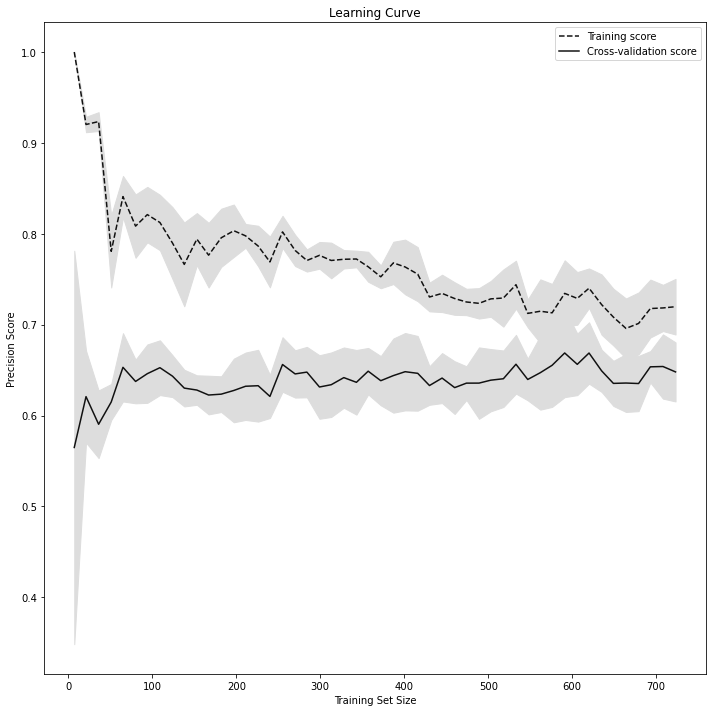

In [77]:



train_sizes,train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=opt["max_depth"]),\
                                                       X[columns_use], y,cv=10,scoring='precision',n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50), random_state=int(opt['random_state']))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [169]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import tree
import graphviz 

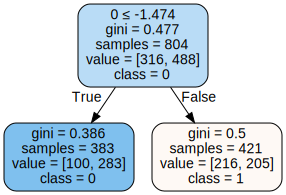

In [171]:
dot_data = tree.export_graphviz(xgb, out_file=None, 
                     feature_names=X_pca.drop(columns = 'y').columns,  
                     class_names=['1','0'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

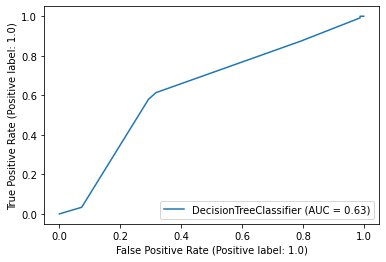

In [114]:
metrics.plot_roc_curve(xgb, X_test, y_test)  
plt.show()   

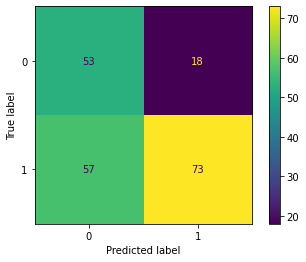

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_result)
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()  

In [84]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)


In [97]:

shap.force_plot(explainer.expected_value, np.array(shap_values)[-1, :], X_test.iloc[-1, :])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [96]:
np.array(shap_values)[-1, :]

array([[ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.07618297,  0.        , ...,  0.00265821,
        -0.01645288,  0.01215427],
       ...,
       [ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.02766422,  0.        , ..., -0.09494014,
         0.04184166,  0.04542116],
       [ 0.        ,  0.11300173,  0.        , ..., -0.18794667,
         0.07490289, -0.02643616]])

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [116]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   8_TOTAL_FALENCIA_REQ              804 non-null    float64
 1   8_TOTAL_FALENCIA__CONC            804 non-null    float64
 2   7_TOTAL_COMMITMENTS               804 non-null    float64
 3   7_TEND_CRESCIMENTO_VENCIDOS       804 non-null    float64
 4   7_VALOR_TOTAL_VENCIDOS            804 non-null    float64
 5   7_TEND_CRESCIMENTO_A_VENCER       804 non-null    float64
 6   7_VALOR_TOTAL_A_VENCER            804 non-null    float64
 7   7_TEND_CRESCIMENTO_TOTAL          804 non-null    float64
 8   7_VALOR_TOTAL_TOTAL               804 non-null    float64
 9   7_POSSUI_CRESCIMENTO              804 non-null    float64
 10  6_TOTAL_PAGAMENTOS                804 non-null    float64
 11  6_PAGAMENTO_PERCENT_15            804 non-null    float64
 12  6_PAGAME

# PCA

In [105]:
df_scaled = df_scaled.drop(columns = ['_id','cnpj','txt_file','result'])

In [176]:
from scipy.stats import skew 

import matplotlib.pyplot as plt 
import seaborn as sns


C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


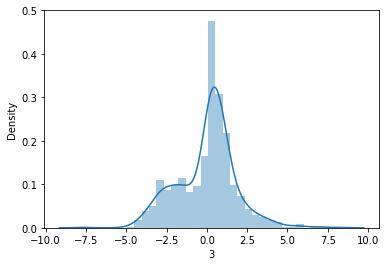

In [219]:
i = 3
sns.distplot(X_pca[i])

X_pca[3] = np.log(X_pca[3])

C:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3', ylabel='Density'>

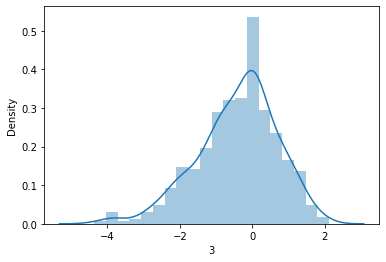

In [217]:
sns.distplot(np.log(X_pca[i]))

In [209]:
pca = PCA(n_components=12, svd_solver = 'auto')
Principal_components=pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12'])
# print(pca_df)

In [118]:
for_visual = pd.concat([pca_df, df['result']], axis = 1)

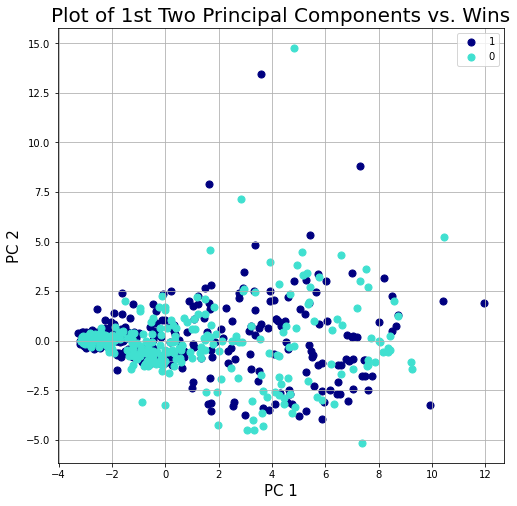

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Wins', fontsize = 20)
W_GROUP = [1,0]
colors = ['navy', 'turquoise']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['result'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 5']
               , c = color
               , s = 50)
ax.legend(W_GROUP)
ax.grid()

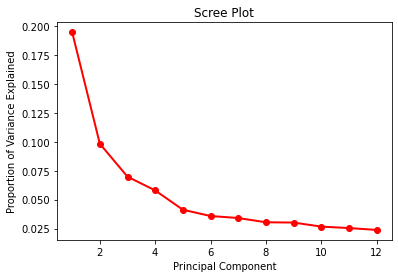

In [120]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [121]:
pca.n_components_

12

In [165]:
pca = PCA(n_components=5, svd_solver = 'auto')

pca_model =pca.fit(df_scaled)
import pickle as pk
pk.dump(pca_model, open("pca.pkl","wb"))

In [221]:
X_pca = pd.DataFrame(pca_model.transform(df_scaled))

In [222]:
X_pca['y'] = df['result']

In [110]:
#score: 0.794983388704319 
better_result = {'max_depth': 2.0,
 'columns_use': 2.0,
 'test_size': 0.2,
 'random_state': 1191.0}

#score: 0.7403683175397818  
result_1 = {'max_depth': 2.0,
 'columns_use': 12.0,
 'test_size': 0.2,
 'random_state': 2581.0}

#score: 0.708176
result_2 = {'max_depth': 4.0,
 'columns_use': 11.0,
 'test_size': 0.28,
 'random_state': 899.0}

#score: 0.7662470663537444  
result_3 = {'max_depth': 3.0,
 'columns_use': 10.0,
 'test_size': 0.25,
 'random_state': 4948.0}


#score: 0.7602
result_4 = {'max_depth': 2.0,
 'columns_use': 17.0,
 'test_size': 0.25,
 'random_state': 716.0}

result_5 = {'max_depth': 3.0,
 'columns_use': 26.0,
 'test_size': 0.25,
 'random_state': 2137.0}

In [223]:
opt = result_5
xgb = DecisionTreeClassifier(
    max_depth=1,
)

X_train, X_test, y_train, y_test = train_test_split(X_pca.drop(columns = 'y')
                                                    , df['result'],\
                                                    test_size=0.25, \
                                                    random_state=int(opt['random_state']))
xgb.fit(X_train, y_train)
y_result = xgb.predict(X_test)
k_result = xgb.predict_proba(X_test)

print(accuracy_score(y_test, y_result))
print(precision_score(y_test, y_result))
print(recall_score(y_test, y_result))

0.6268656716417911
0.8021978021978022
0.5615384615384615


In [224]:
xgb.fit(X_pca.drop(columns = 'y'), df['result'])

DecisionTreeClassifier(max_depth=1)

In [226]:
from datetime import datetime

In [227]:
joblib.dump(xgb, "Predictor/Models/DecisionTree_"+datetime.now().date().strftime("%Y-%m-%d")+".joblib")


['Predictor/Models/DecisionTree_2021-05-20.joblib']

In [149]:
np.linspace(0.01, 1.0, 50)

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

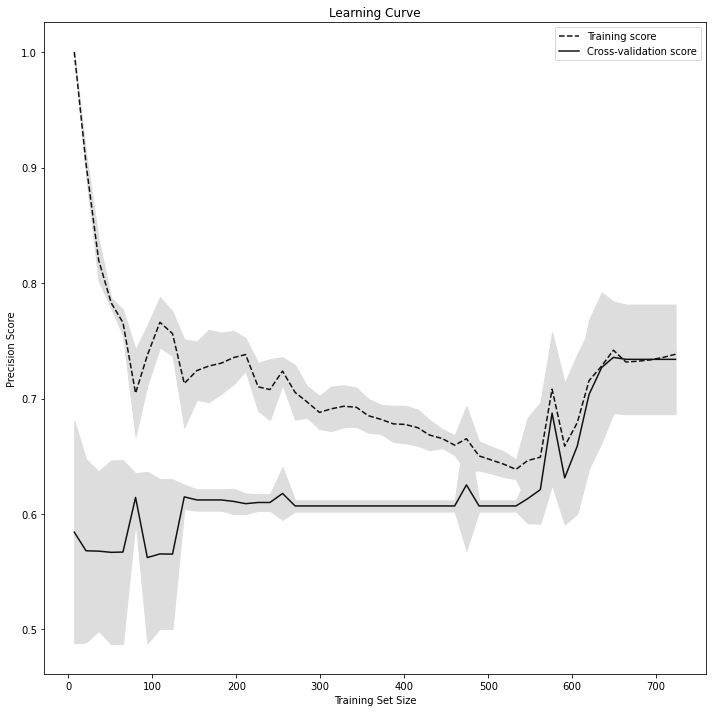

In [150]:



train_sizes,train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=1),\
                                                       X_pca.drop(columns = 'y'), y,cv=10,scoring='precision',n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

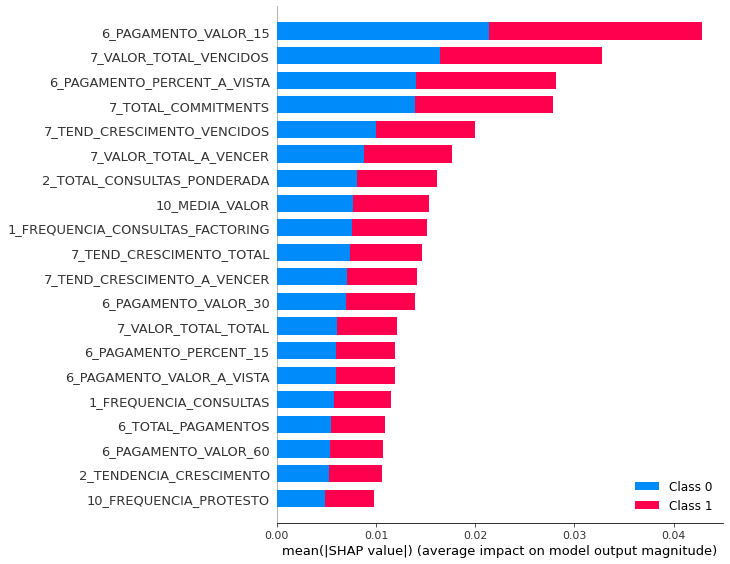